<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a serious of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [46]:
movies = pd.read_csv('./data/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [6]:
# Answer:

movies.shape


(979, 6)

#### Check the data type of each column.

In [7]:
# Answer:

movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

#### Calculate the average movie duration.

In [8]:
# Answer:

movies.duration.mean()

120.97957099080695

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [9]:
# Answer:

#shortest movie:
print(movies.sort_values('duration').head(1))

#longest movie:
print(movies.sort_values('duration', ascending = False).head(1))



     star_rating   title content_rating  genre  duration  \
389          8.0  Freaks        UNRATED  Drama        64   

                                           actors_list  
389  [u'Wallace Ford', u'Leila Hyams', u'Olga Bacla...  
     star_rating   title content_rating  genre  duration  \
476          7.8  Hamlet          PG-13  Drama       242   

                                           actors_list  
476  [u'Kenneth Branagh', u'Julie Christie', u'Dere...  


#### Create a histogram of duration, choosing an "appropriate" number of bins.

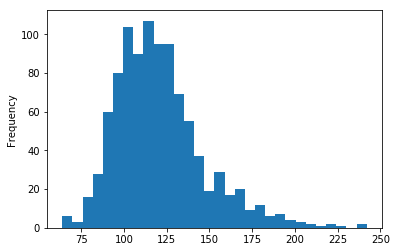

In [10]:
# Answer:

movies.duration.plot(kind='hist', bins = 30)

#### Use a box plot to display that same data.

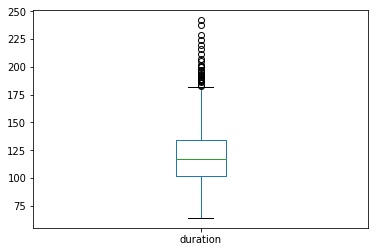

In [11]:
# Answer:

movies.duration.plot(kind = 'box')

## Intermediate level

#### Count how many movies have each of the content ratings.

In [12]:
# Answer:

movies.content_rating.describe() #There are at most 12 content ratings in this dataset

movies.title.value_counts().sort_values(ascending=False)

#movies[movies.title == 'Les Miserables']

#0 because the most # of content ratings for a movie is 2

The Girl with the Dragon Tattoo               2
Dracula                                       2
True Grit                                     2
Les Miserables                                2
The Magnificent Seven                         1
High Noon                                     1
Network                                       1
Whale Rider                                   1
The Dirty Dozen                               1
Ghost Dog: The Way of the Samurai             1
Toy Story                                     1
Stalker                                       1
This Is Spinal Tap                            1
Lock, Stock and Two Smoking Barrels           1
Running Scared                                1
Open Range                                    1
Rushmore                                      1
Donnie Darko                                  1
La piel que habito                            1
Robin Hood                                    1
Memories of Murder                      

#### Use a visualization to display that same data, including a title and x and y labels.

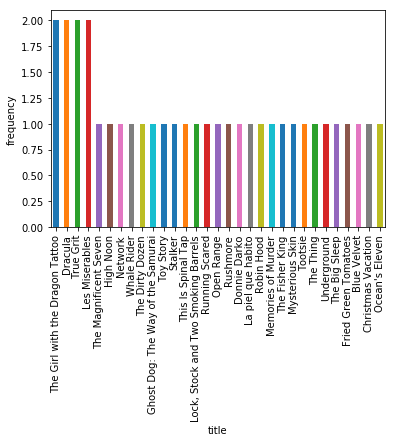

In [13]:
# Answer:
ax = movies.title.value_counts().sort_values(ascending = False).head(31).plot(kind = 'bar')
ax.set_xlabel('title')
ax.set_ylabel('frequency');

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [15]:
# Answer:

movies.content_rating.replace(['NOT RATED', 'APPROVED', 'PASSED', 'GP'], 'UNRATED')

0            R
1            R
2            R
3        PG-13
4            R
5      UNRATED
6      UNRATED
7        PG-13
8            R
9            R
10       PG-13
11       PG-13
12          PG
13       PG-13
14       PG-13
15       PG-13
16           R
17     UNRATED
18           R
19          PG
20           R
21           R
22     UNRATED
23           R
24           R
25       PG-13
26       PG-13
27           R
28           R
29     UNRATED
        ...   
949         PG
950          R
951          R
952          R
953         PG
954      PG-13
955          R
956         PG
957          R
958      PG-13
959          R
960      PG-13
961          R
962         PG
963          R
964      PG-13
965      PG-13
966      PG-13
967          R
968          R
969          R
970          R
971          R
972      NC-17
973      PG-13
974         PG
975         PG
976      PG-13
977         PG
978          R
Name: content_rating, Length: 979, dtype: object

#### Convert the following content ratings to "NC-17": X, TV-MA.

In [16]:
# Answer:

movies.content_rating.replace(['X', 'TV-MA'], 'NC-17')

0              R
1              R
2              R
3          PG-13
4              R
5      NOT RATED
6      NOT RATED
7          PG-13
8              R
9              R
10         PG-13
11         PG-13
12            PG
13         PG-13
14         PG-13
15         PG-13
16             R
17       UNRATED
18             R
19            PG
20             R
21             R
22      APPROVED
23             R
24             R
25         PG-13
26         PG-13
27             R
28             R
29        PASSED
         ...    
949           PG
950            R
951            R
952            R
953           PG
954        PG-13
955            R
956           PG
957            R
958        PG-13
959            R
960        PG-13
961            R
962           PG
963            R
964        PG-13
965        PG-13
966        PG-13
967            R
968            R
969            R
970            R
971            R
972        NC-17
973        PG-13
974           PG
975           PG
976        PG-

#### Count the number of missing values in each column.

In [17]:
# Answer:

movies.isnull().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [18]:
# Answer:

movies[movies.content_rating.isnull() == True]

,star_rating,title,content_rating,genre,duration,actors_list
187,8.2,Butch Cassidy and the Sundance Kid,NaN,Biography,110,"[u'Paul Newman', u'Robert Redford', u'Katharin..."
649,7.7,Where Eagles Dare,NaN,Action,158,"[u'Richard Burton', u'Clint Eastwood', u'Mary ..."
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [19]:
# Answer:

print(movies[movies.duration>=120].star_rating.mean())

print(movies[movies.duration<120].star_rating.mean())

7.948898678414082
7.838666666666657


#### Use a visualization to detect whether there is a relationship between duration and star rating.

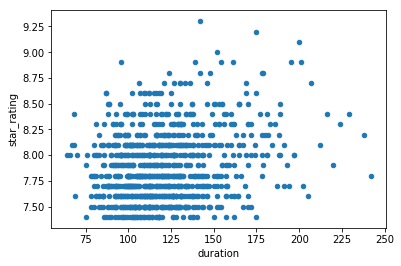

In [20]:
# Answer:
movies.plot(kind = 'scatter', x = 'duration', y = 'star_rating')

#### Calculate the average duration for each genre.

In [21]:
# Answer:

movies.groupby('genre').duration.mean()

genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

## Advanced level

#### Visualize the relationship between content rating and duration.

Text(0.5, 1.0, 'duration by content rating')

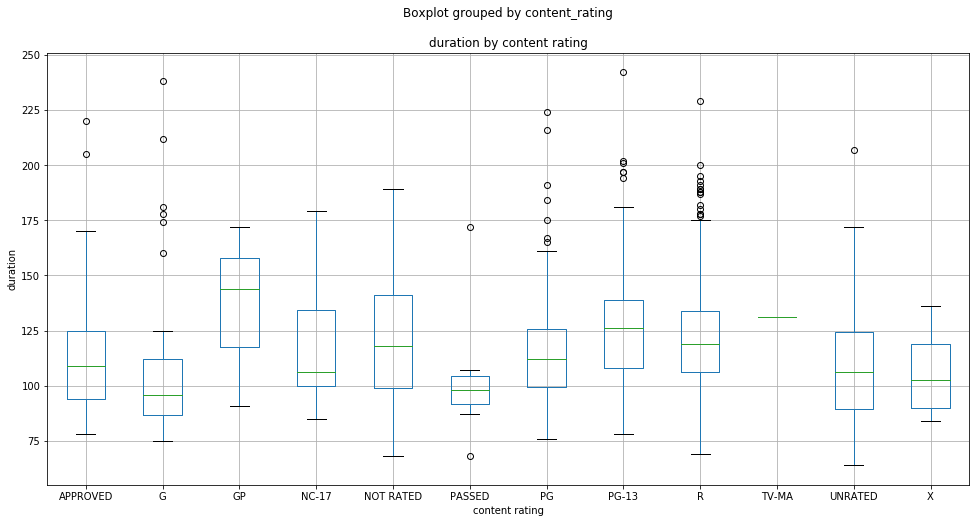

In [22]:
# Answer:
movies.head(10)


ax = movies.boxplot(column = 'duration', by = 'content_rating', figsize = (16,8));

ax.set_xlabel('content rating')
ax.set_ylabel('duration');

ax.set_title('duration by content rating')


#### Determine the top rated movie (by star rating) for each genre.

In [3]:
# Answer:

movies.groupby('genre').star_rating.max()

genre
Action       9.0
Adventure    8.9
Animation    8.6
Biography    8.9
Comedy       8.6
Crime        9.3
Drama        8.9
Family       7.9
Fantasy      7.7
Film-Noir    8.3
History      8.0
Horror       8.6
Mystery      8.6
Sci-Fi       8.2
Thriller     8.0
Western      8.9
Name: star_rating, dtype: float64

#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [10]:
# Answer:

#movies.title.duplicated()

movies[movies.title.duplicated()]

,star_rating,title,content_rating,genre,duration,actors_list
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


#### Option 1: manually create a list of relevant genres, then filter using that list

In [71]:
# Answer:

relevant_genres = movies.groupby('genre').title.count() #count number of movies for each genre

relevant_genres[relevant_genres > 10]


movies[movies.genre.isin(['Action', 'Adventure', 'Animation', 
                          'Biography', 'Comedy', 'Crime', 'Drama', 
                          'Horror', 'Mystery'])].groupby('genre').star_rating.mean()





genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [74]:
# Answer:

relevant_movies = movies.genre.value_counts()

relevant_movies[relevant_movies>10]

movies[movies.genre.isin(['Action', 'Adventure', 'Animation', 
                          'Biography', 'Comedy', 'Crime', 'Drama', 
                          'Horror', 'Mystery'])].groupby('genre').star_rating.mean()




genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [75]:
# Answer:

star_rating = movies.groupby('genre').star_rating.agg('mean')

relevant_movies = movies.genre.value_counts()

star_rating[relevant_movies>10]





genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 4: aggregate by count and mean, then filter using the count

In [77]:
# Answer:

star_rating = movies.groupby('genre').star_rating.agg(['count', 'mean'])

relevant_movies = movies.genre.value_counts()

star_rating[relevant_movies>10]

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


,count,mean
genre,,
Action,136,7.884559
Adventure,75,7.933333
Animation,62,7.914516
Biography,77,7.862338
Comedy,156,7.822436
Crime,124,7.916935
Drama,278,7.902518
Horror,29,7.806897
Mystery,16,7.975000


## Bonus

#### Figure out something "interesting" using the actors data!